In [ ]:
from google.colab import drive
drive.mount('/content/drive')
base_dir = "/content/drive/My Drive/SchneiderProducts_new/"
train_data_dir = "/content/drive/My Drive/SchneiderProducts_new/train"
test_data_dir = "/content/drive/My Drive/SchneiderProducts_new/test"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wGiKLpbLCZM97n9aUQ_LDwrnJyWJ9s0ouKZiqFJ2TvuRp4_nL4jJJ8
Mounted at /content/drive


In [ ]:
import tensorflow as tf

In [ ]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
BATCH_SIZE = 32
IMG_SHAPE = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
baseModel = tf.keras.applications.MobileNetV2(
    weights = 'imagenet',
    include_top = False,
    input_shape=IMG_SHAPE
)

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
baseModel.trainable = False

model = tf.keras.Sequential(
    [
     baseModel,

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1024, activation="relu"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(6, activation="softmax")]
)

     tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=IMG_SHAPE),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPooling2D(3,3),
     tf.keras.layers.Dropout(0.25),


     tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Dropout(0.25),


     tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Dropout(0.25),

In [ ]:
trainDatagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,
   horizontal_flip = True,
   width_shift_range=0.2,
   height_shift_range=0.2,
   rotation_range=15,
   vertical_flip=True,
   fill_mode='reflect',
   data_format='channels_last',
   brightness_range=[0.5, 1.5])

testDatagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(3e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              64226304  
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 6150      
Total params: 66,494,534
Trainable params: 64,234,502
Non-trainable params: 2,260,032
__________________________________

In [ ]:
train_generator = trainDatagen.flow_from_directory(
        train_data_dir,
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=BATCH_SIZE
        )

test_generator = testDatagen.flow_from_directory(
    test_data_dir,
    target_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size = BATCH_SIZE
    )



Found 202 images belonging to 6 classes.
Found 71 images belonging to 6 classes.


In [ ]:
model.fit(train_generator)

7/7 [==============================] - 43s 6s/step - loss: 2.1258 - accuracy: 0.5842


In [ ]:
history = model.fit_generator(train_generator, epochs = 20, validation_data=test_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
7/7 [==============================] - 24s 3s/step - loss: 0.6012 - accuracy: 0.8366 - val_loss: 5.1847 - val_accuracy: 0.6197
Epoch 2/20
7/7 [==============================] - 6s 918ms/step - loss: 0.5135 - accuracy: 0.8713 - val_loss: 1.9915 - val_accuracy: 0.7746
Epoch 3/20
7/7 [==============================] - 7s 943ms/step - loss: 0.2985 - accuracy: 0.9109 - val_loss: 1.3661 - val_accuracy: 0.8310
Epoch 4/20
7/7 [==============================] - 7s 943ms/step - loss: 0.3323 - accuracy: 0.9109 - val_loss: 1.2448 - val_accuracy: 0.8310
Epoch 5/20
7/7 [==============================] - 7s 1s/step - loss: 0.1244 - accuracy: 0.9455 - val_loss: 1.3170 - val_accuracy: 0.8028
Epoch 6/20
7/7 [==============================] - 6s 915ms/step - loss: 0.2950 - accuracy: 0.9208 - val_loss: 0.9323 - val_accuracy: 0.8028
Epoch 7/20
7/7 [==============================] - 7s 1s/step - loss: 0.1965 - accuracy: 0

In [ ]:
layer_outputs = [layer.output for layer in model.layers[0:]]
layer_outputs
##model1 = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)


[<tf.Tensor 'out_relu/Relu6:0' shape=(None, 7, 7, 1280) dtype=float32>,
 <tf.Tensor 'flatten_1/Reshape:0' shape=(None, 62720) dtype=float32>,
 <tf.Tensor 'dense_2/Relu:0' shape=(None, 1024) dtype=float32>,
 <tf.Tensor 'batch_normalization_1/batchnorm/add_1:0' shape=(None, 1024) dtype=float32>,
 <tf.Tensor 'dropout_1/cond/Identity:0' shape=(None, 1024) dtype=float32>,
 <tf.Tensor 'dense_3/Softmax:0' shape=(None, 6) dtype=float32>]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt

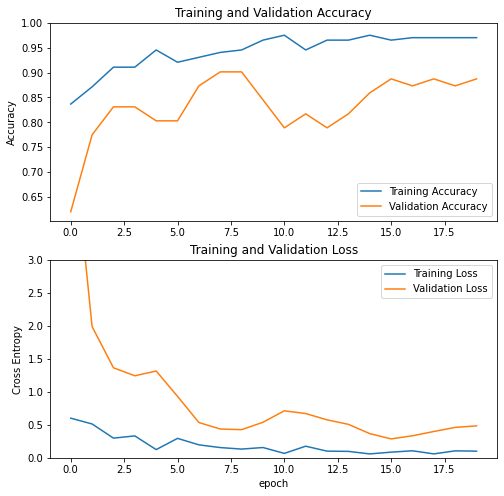

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.save(base_dir+'SchneiderProducts.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

See the following https://www.tensorflow.org/lite/convert

In [ ]:
tflite_model = converter.convert()
open(base_dir+"SchneiderProducts.tflite", "wb").write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpro738ocb/assets


265808368

In [ ]:
from tensorflow.keras.models import load_model
model = load_model(base_dir+"SchneiderProducts.h5")
# model._make_predict_function()
print("Model Loaded")

Model Loaded


In [ ]:
validation_directory = testDatagen.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=16)

Found 71 images belonging to 6 classes.


In [ ]:
filepath_list = validation_directory.filepaths

In [ ]:
labels_list = validation_directory.class_indices

In [ ]:
# Inverse the Labels with Keys
labels_list = dict((v,k) for k,v in labels_list.items())

In [ ]:
def predict_image(image_path):
    image = Image.open(image_path)
    # Resize the image to 224, 224, so that our model can understand it.
    image = image.resize((224, 224))
    images.append(image)
    #Convert the image to Array (Flatten the image)
    image_array = np.array(image)
    # Normalize the image to the values between 0 to 1 (i.e is the reason we are dividing by 255)
    normalized_image_array = image_array / 255.0
    #Create a 3 dimentional array of 224,224 with 3 channels.
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    data[0] = normalized_image_array
    prediction = model.predict(data)
    # Get the Max of the Prediction array and find the Label name from the Labels List and append to the labels predicted list.
    labels_predicted.append(labels_list[np.argmax(prediction)])
    accuray.append(prediction[0][np.argmax(prediction)])

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
images = []
labels_predicted = []
accuray = []
i = 0
filepaths = validation_directory.filepaths
for imagepath in filepaths:
    predict_image(imagepath)
    accuray[i]
    labels_predicted[i]
    i = i + 1

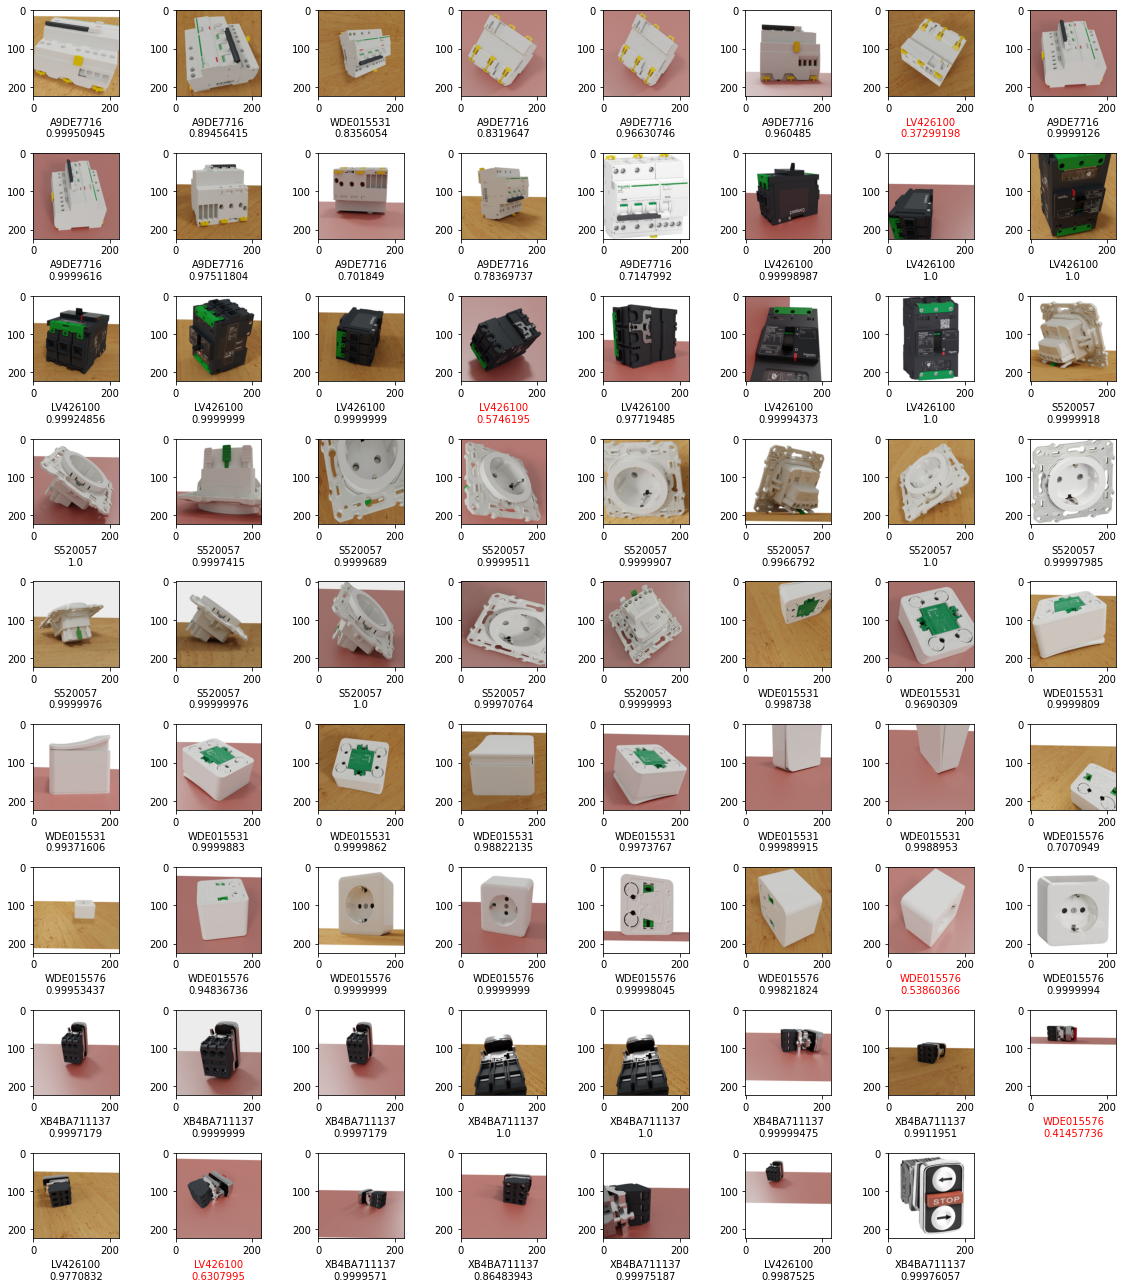

In [ ]:
num_cols = 8
num_images = len(images)
num_rows = round(num_images/num_cols)
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(images[i])
    label = plt.xlabel(labels_predicted[i] +  "\n" + str(accuray[i]))
    if accuray[i] < 0.7 :
        label.set_color('red')

plt.tight_layout()
plt.show()
